# House Price Prediction - Regression Task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. Generate Synthetic Data
np.random.seed(42)
n_samples = 500

size = np.random.normal(1500, 500, n_samples)  # Size in sq ft
bedrooms = np.random.randint(1, 6, n_samples)  # Number of bedrooms
location_score = np.random.uniform(1, 10, n_samples)  # Simulated location score

# Create price with some noise
price = (size * 300) + (bedrooms * 50000) + (location_score * 10000) + np.random.normal(0, 50000, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'Size(sqft)': size,
    'Bedrooms': bedrooms,
    'LocationScore': location_score,
    'Price': price
})

In [3]:
# 2. Data Exploration
print(data.head())
print(data.describe())

    Size(sqft)  Bedrooms  LocationScore          Price
0  1748.357077         2       7.914461  667731.366921
1  1430.867849         2       4.759901  621605.584067
2  1823.844269         3       4.792213  730327.927005
3  2261.514928         3       7.638241  967223.989238
4  1382.923313         5       3.148994  662692.405698
        Size(sqft)    Bedrooms  LocationScore         Price
count   500.000000  500.000000     500.000000  5.000000e+02
mean   1503.418997    2.966000       5.565277  6.591591e+05
std     490.626624    1.422988       2.636421  1.735419e+05
min    -120.633670    1.000000       1.044460  2.054659e+05
25%    1149.846298    2.000000       3.146220  5.452430e+05
50%    1506.398573    3.000000       5.649885  6.665460e+05
75%    1818.391627    4.000000       7.830581  7.780568e+05
max    3426.365745    5.000000       9.994724  1.318946e+06


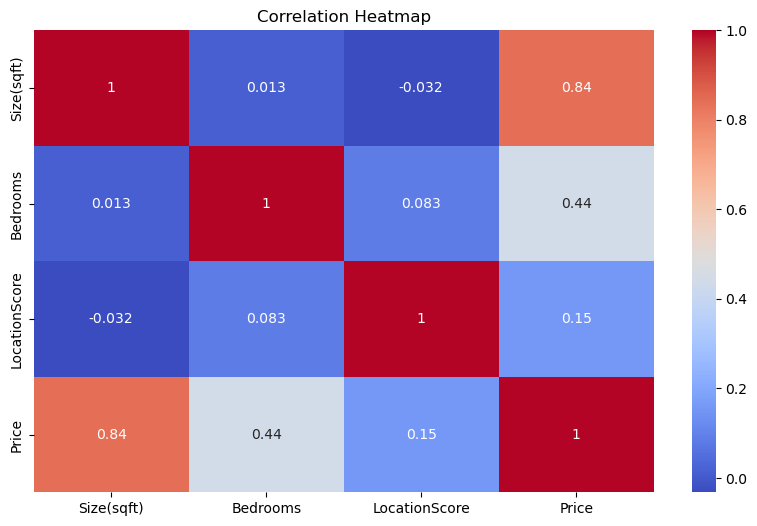

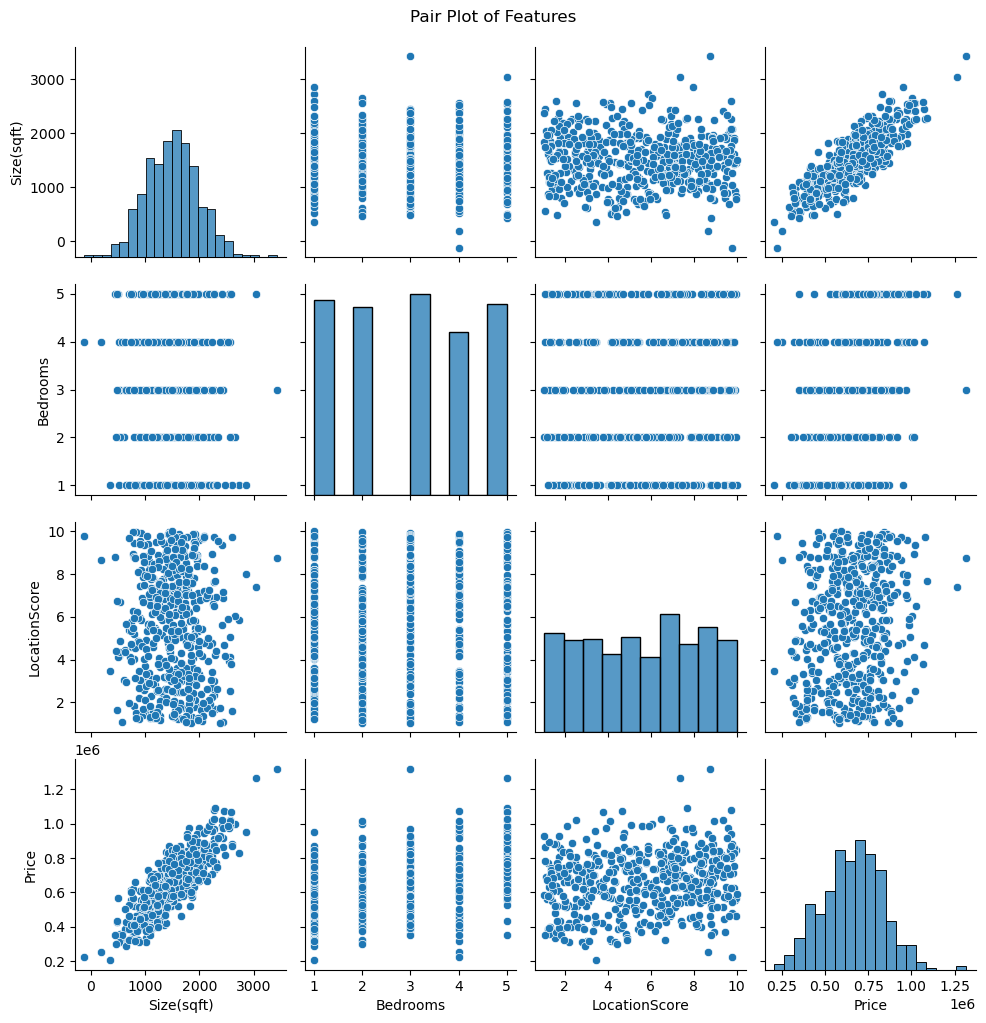

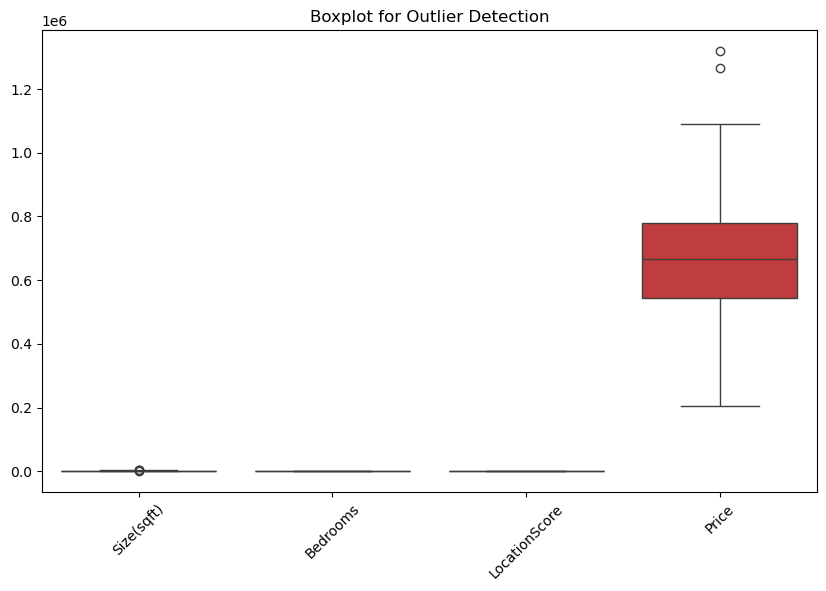

In [4]:
# 3. Visualizations
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(data)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [6]:
# 4. Data Splitting
X = data[['Size(sqft)', 'Bedrooms', 'LocationScore']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 5. Feature Scaling (for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 6. Model Training
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [9]:
# 7. Evaluation
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Results:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression Results:
MAE: 38022.63
MSE: 2180012099.50
R2 Score: 0.9268

Random Forest Results:
MAE: 52211.58
MSE: 4566509243.08
R2 Score: 0.8467


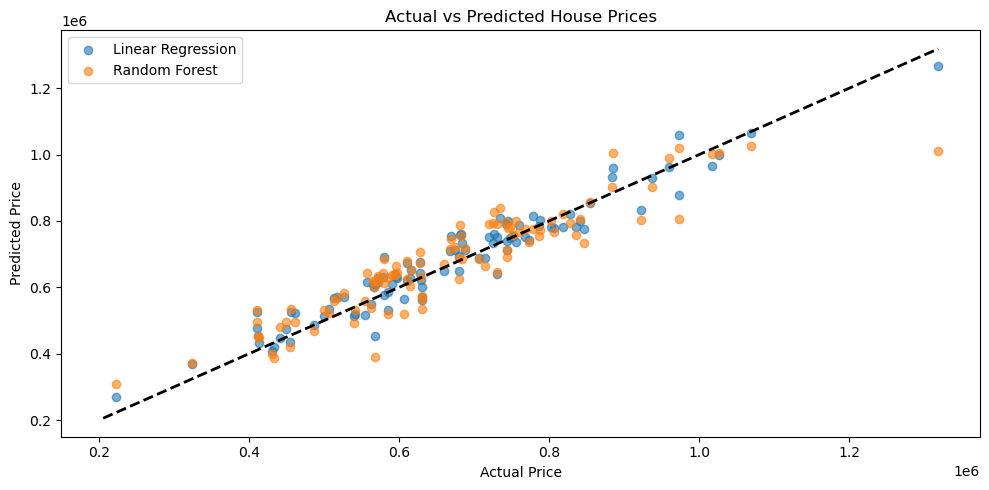

In [10]:
# 8. Actual vs Predicted Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.tight_layout()
plt.show()